<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/clustering/clustering_gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering with Gaussian mixture models

In [1]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

import sklearn

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows





In this section, we show how to find clusters in an unlabeled 2d version of the Iris dataset by fitting a GMM using sklearn.




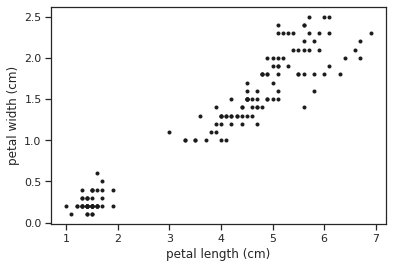

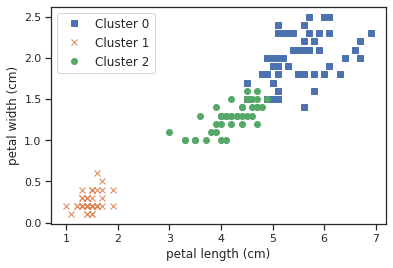

In [2]:
import seaborn as sns

from sklearn.datasets import load_iris
#from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris = load_iris()
X = iris.data

fig, ax = plt.subplots()
idx1 = 2; idx2 = 3;
ax.scatter(X[:, idx1], X[:, idx2], c="k", marker=".")
ax.set(xlabel = iris.feature_names[idx1])
ax.set(ylabel = iris.feature_names[idx2])
#save_fig("iris-2d-unlabeled")
plt.show()


K = 3
y_pred = GaussianMixture(n_components=K, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

colors = sns.color_palette()[0:K]
markers = ('s', 'x', 'o', '^', 'v')
fig, ax = plt.subplots()
for k in range(0, K):
  ax.plot(X[y_pred==k, idx1], X[y_pred==k, idx2], color=colors[k], \
          marker=markers[k], linestyle = 'None', label="Cluster {}".format(k))
ax.set(xlabel = iris.feature_names[idx1])
ax.set(ylabel = iris.feature_names[idx2])
plt.legend(loc="upper left", fontsize=12)
#save_fig("iris-2d-gmm")
plt.show()
